 # About the dataset

A telecommunications provider has divided its customers into four groups based on their service usage patterns. The provider aims to customize offers for individual prospective customers by predicting their group membership using demographic data. This is a classification problem where a model needs to be developed using a labeled dataset to predict the group membership of new or unknown cases. In other words, given demographic data, the model should be able to predict which of the four predefined groups a customer belongs to.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases.


In [23]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [20]:
#using the pandas library to load our data
Telecom_data = pd.read_csv(r'C:\Users\Samsung\OneDrive\Desktop\Python Tutorials\Telecom_data.csv')
Telecom_data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


# Data Exploration

In [3]:
Telecom_data.shape

(1000, 12)

In [4]:
Telecom_data.info

<bound method DataFrame.info of      region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9      64   4       5       0   
1         3      11   33        1        7     136   5       5       0   
2         3      68   52        1       24     116   1      29       0   
3         2      33   33        0       12      33   2       0       0   
4         2      23   30        1        9      30   1       2       0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0      27   3       0       0   
996       1       7   34        0        2      22   5       5       0   
997       3      67   59        0       40     944   5      33       0   
998       3      70   49        0       18      87   2      22       0   
999       3      50   36        1        7      39   3       3       0   

     gender  reside  custcat  
0         0       2        1  
1         0      

In [14]:
Telecom_data['custcat'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64>

In [21]:
# Showing the distribution of each group of customer. this shows that Plus Service customers are the most prevalent
Telecom_data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

## 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

In [22]:
Telecom_data.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


The correlation matrix provides insights into the relationships between different features, and can help identify important features for building a predictive model. Positive correlation values indicate that two features increase or decrease together, while negative correlation values indicate that one feature increases while the other decreases. A correlation value of zero indicates no linear relationship between the two features.

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


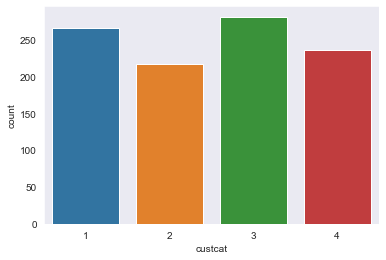

In [45]:
sns.countplot(Telecom_data['custcat'])
sns.set_style('darkgrid')

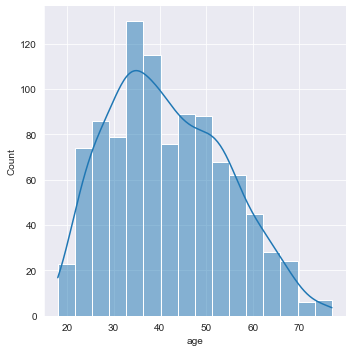

In [83]:
# Visualizing the age Distribution of the customers dark, whitegrid, darkgrid, ticks
sns.displot(x = 'age', data = Telecom_data, kde = 'true')
sns.set_style('darkgrid')

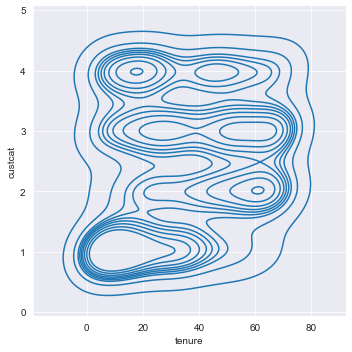

In [68]:
sns.displot(x = 'tenure', y = 'custcat', data = Telecom_data, kind = 'kde')

<AxesSubplot:ylabel='gender'>

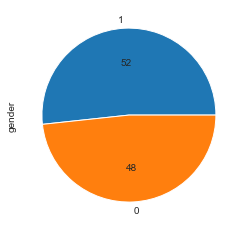

In [79]:
Telecom_data['gender'].value_counts().plot(kind = 'pie', autopct = '%2.f')

<AxesSubplot:ylabel='ed'>

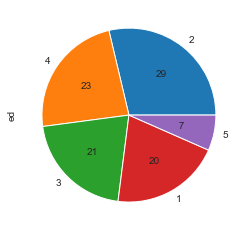

In [80]:
Telecom_data['ed'].value_counts().plot(kind = 'pie', autopct = '%2.f')

This shows that  customers in the Basic level category spend about 0-25 months using the service whiles, customers in the Total service category spend not more than 40 - 60 months 

In [ ]:
# ####To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array

In [77]:
X = Telecom_data[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4]],
      dtype=int64)

In [78]:
y = Telecom_data['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# Data Normalization
We can see that each feature has been standardized so that it has a mean of 0 and a standard deviation of 1. This will ensure that each feature contributes equally to the machine learning model and will improve the accuracy of the model.

In [89]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print('Train_set: ', X_train.shape, y_train.shape)
print('Test_set: ',y_train.shape, y_test.shape)

Train_set:  (700, 11) (700,)
Test_set:  (700,) (300,)


In [96]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([3, 1, 3, 2, 4], dtype=int64)

In [99]:
#Accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.5371428571428571
Test set Accuracy:  0.33


In [100]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
y_hat = neigh.predict(X_test)
y_hat[0:5]

#Accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.5214285714285715
Test set Accuracy:  0.31666666666666665


In [101]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
y_hat = neigh.predict(X_test)
y_hat[0:5]

#Accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.49714285714285716
Test set Accuracy:  0.33666666666666667


We can calculate the accuracy of KNN for different values of k

In [103]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

[0.28       0.27333333 0.30666667 0.33       0.34       0.31666667
 0.34       0.31666667 0.32666667]


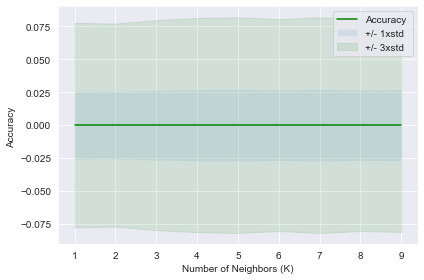

In [106]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()